In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 将工作环境调整至/data/planogram_segmented下, 获得水平分割完成的图像
path1 = os.path.abspath('..')
path2 = path1.replace('\\', '/')
os.chdir(path2 + '/data/planogram_segmented/')

In [6]:
img_1 = cv2.imread('IMG_0114_1.jpg', 1)
img_2 = cv2.imread('IMG_0114_2.jpg', 1)

In [4]:
def gray_image_show(img):
    plt.figure(figsize=(8, 10))
    plt.imshow(img, cmap='gray', interpolation='bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()

def color_image_show(img):
    plt.figure(figsize=(8, 10))
    image_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_show, cmap='gray', interpolation='bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()

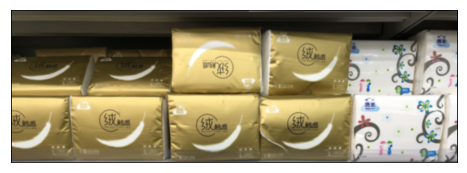

In [7]:
color_image_show(img_1)

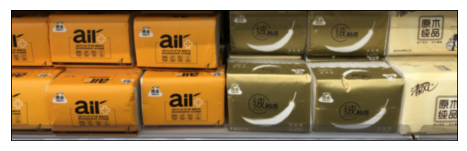

In [8]:
color_image_show(img_2)

In [20]:
gray_img = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray_img, (5, 5), 2)
canny_img = cv2.Canny(blur_img, 50, 200)

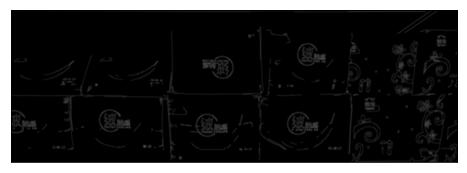

In [21]:
gray_image_show(canny_img)

In [22]:
img_1_transpose = np.swapaxes(canny_img, 0, 1)
img_1_array = []
for line in img_1_transpose:
    img_1_array.append(line.sum())

img_1_array = np.asarray(img_1_array)
img_1_df = pd.DataFrame(img_1_array, columns=['gray_sum'])
img_1_df = img_1_df/img_1_array.max()

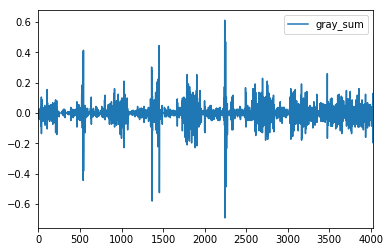

In [46]:
img_1_df.diff().plot()

In [49]:
def show_gray_diff(image, blur_size=3, canny_threshold_1=50, canny_threshold_2=200):
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(image, (blur_size, blur_size), 2)
    canny_img = cv2.Canny(image, canny_threshold_1, canny_threshold_2)
    image_transpose = np.swapaxes(image, 0, 1)
    image_array = []
    for line in image_transpose:
        image_array.append(line.sum())
    
    image_array = np.asarray(image_array)
    image_df = pd.DataFrame(image_array, columns=['gray_sum'])
    image_df = image_df/image_array.max()
    image_df = image_df.diff()
    image_df['gray_sum'] = image_df['gray_sum'].map(np.fabs)
    image_df.plot()
    return image_df

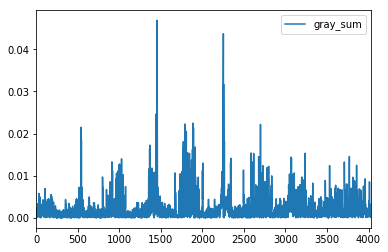

In [52]:
df1 = show_gray_diff(img_1, canny_threshold_1=100)

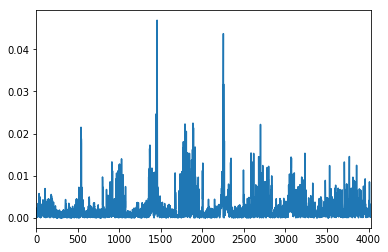

In [40]:
df1.plot()